A quick overview from the [docs](http://xgboost.readthedocs.io/en/latest/get_started/index.html#python) or read the full paper [here](https://arxiv.org/pdf/1603.02754)


In [17]:
%matplotlib notebook
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/model/struct_score.png")

Basically, for a given tree structure, we push the statistics gigi and hihi to the leaves they belong to, sum the statistics together, and use the formula to calculate how good the tree is. This score is like the impurity measure in a decision tree, except that it also takes the model complexity into account. XGBoost Tree models comprise of:

* Loss Function - As shown above
* Weak Learner - Regression Based Decision Trees, constructed on a greedy manner, using Gini for split points
* Additive Model - Using functional gradient descent to add trees that reduce the model's loss

VANILLA XGBOOST:

In [27]:
from numpy import loadtxt
from xgboost import XGBClassifier, plot_tree, plot_importance
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

# Load dataset - split into features & labels
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]

# Split dataset into train & test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Training the model
model = XGBClassifier()
model.fit(X_train, y_train) # Can also use Kfold or Stratified-KFold
print(model)

# Make Predictions 
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy: 77.95%


<IPython.core.display.Javascript object>


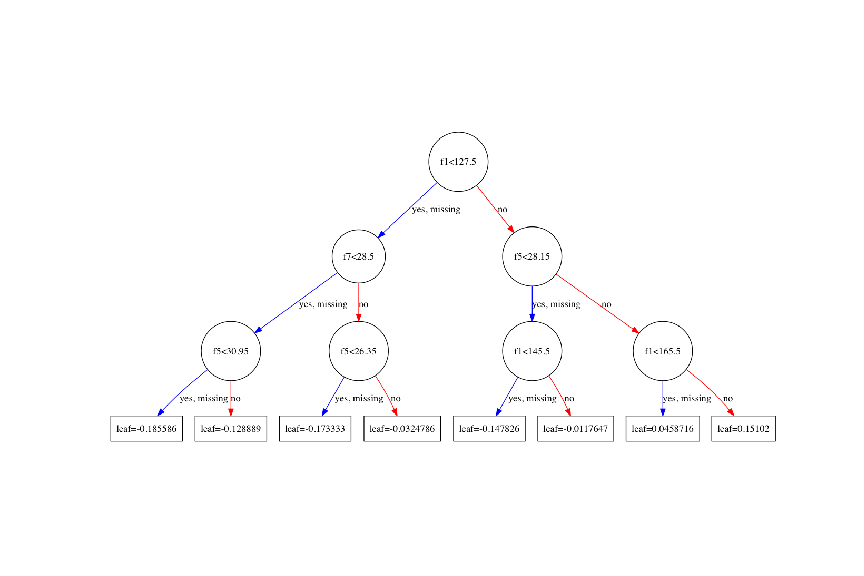

In [28]:
plot_tree(model)
plt.show()

<IPython.core.display.Javascript object>


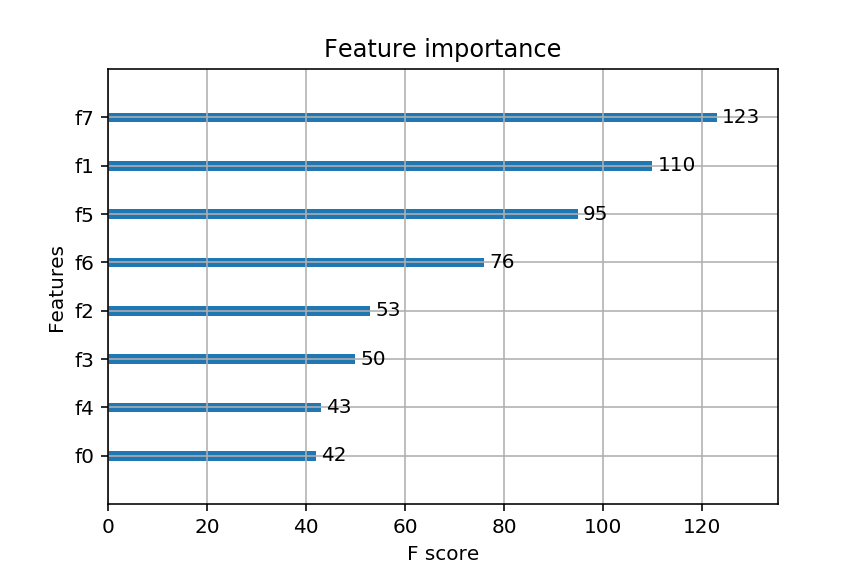

In [31]:
plot_importance(model)
plt.show()

In [34]:

# Fit model using each importance as a threshold
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(model.feature_importances_)
for thresh in thresholds:
  # select features using threshold
  selection = SelectFromModel(model, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  # train model
  selection_model = XGBClassifier()
  selection_model.fit(select_X_train, y_train)
# eval model
  select_X_test = selection.transform(X_test)
  y_pred = selection_model.predict(select_X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)
  print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],
      accuracy*100.0))

Thresh=0.071, n=8, Accuracy: 77.95%
Thresh=0.073, n=7, Accuracy: 76.38%
Thresh=0.084, n=6, Accuracy: 77.56%
Thresh=0.090, n=5, Accuracy: 76.38%
Thresh=0.128, n=4, Accuracy: 76.38%
Thresh=0.160, n=3, Accuracy: 74.80%
Thresh=0.186, n=2, Accuracy: 71.65%
Thresh=0.208, n=1, Accuracy: 63.78%


[0]	validation_0-error:0.22179	validation_0-logloss:0.655154	validation_1-error:0.259843	validation_1-logloss:0.660186
[1]	validation_0-error:0.202335	validation_0-logloss:0.623321	validation_1-error:0.26378	validation_1-logloss:0.634854
[2]	validation_0-error:0.196498	validation_0-logloss:0.596815	validation_1-error:0.26378	validation_1-logloss:0.612239
[3]	validation_0-error:0.200389	validation_0-logloss:0.574026	validation_1-error:0.255906	validation_1-logloss:0.593118
[4]	validation_0-error:0.202335	validation_0-logloss:0.553853	validation_1-error:0.255906	validation_1-logloss:0.578303
[5]	validation_0-error:0.202335	validation_0-logloss:0.536789	validation_1-error:0.26378	validation_1-logloss:0.564942
[6]	validation_0-error:0.194553	validation_0-logloss:0.521477	validation_1-error:0.23622	validation_1-logloss:0.555113
[7]	validation_0-error:0.200389	validation_0-logloss:0.507801	validation_1-error:0.255906	validation_1-logloss:0.54499
[8]	validation_0-error:0.194553	validation_0-l

[68]	validation_0-error:0.118677	validation_0-logloss:0.302821	validation_1-error:0.216535	validation_1-logloss:0.503108
[69]	validation_0-error:0.120623	validation_0-logloss:0.30198	validation_1-error:0.216535	validation_1-logloss:0.502673
[70]	validation_0-error:0.120623	validation_0-logloss:0.29991	validation_1-error:0.216535	validation_1-logloss:0.502662
[71]	validation_0-error:0.122568	validation_0-logloss:0.298055	validation_1-error:0.216535	validation_1-logloss:0.50343
[72]	validation_0-error:0.120623	validation_0-logloss:0.296987	validation_1-error:0.216535	validation_1-logloss:0.504037
[73]	validation_0-error:0.120623	validation_0-logloss:0.295123	validation_1-error:0.216535	validation_1-logloss:0.504439
[74]	validation_0-error:0.118677	validation_0-logloss:0.294368	validation_1-error:0.216535	validation_1-logloss:0.503697
[75]	validation_0-error:0.118677	validation_0-logloss:0.293513	validation_1-error:0.216535	validation_1-logloss:0.504477
[76]	validation_0-error:0.116732	va

<IPython.core.display.Javascript object>


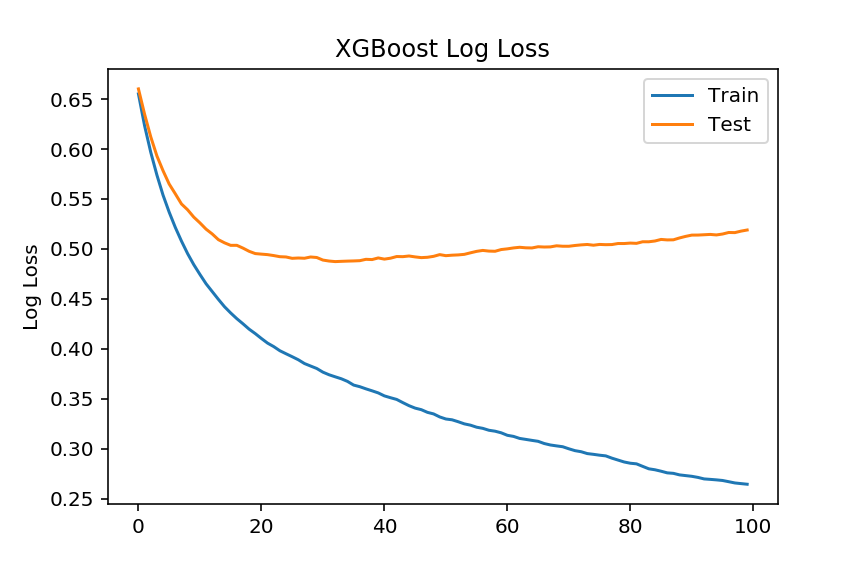

<IPython.core.display.Javascript object>


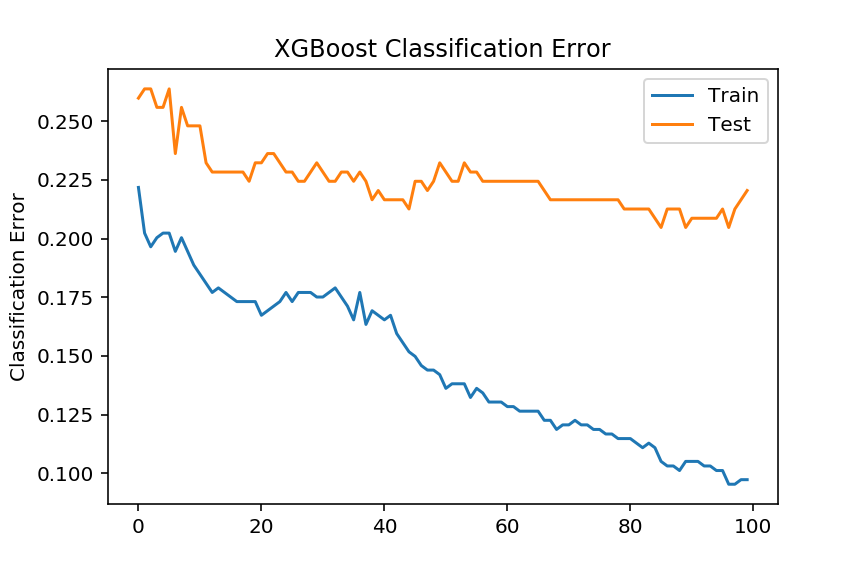

In [37]:
# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set,
    verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train') 
ax.plot(x_axis, results['validation_1']['logloss'], label='Test') 
ax.legend()

pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train') 
ax.plot(x_axis, results['validation_1']['error'], label='Test') 
ax.legend()

pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()